In [0]:
import pandas as pd
import numpy as np


In [0]:
import tensorflow as tf

In [0]:
property = pd.read_csv('https://raw.githubusercontent.com/lannstoirme/AustralianPropertyPricesTensorflowMLPredictions/master/RES_PROP_INDEX_14112019113124265.csv')

# Property Price Index: 
A house price index (HPI) measures the price changes of residential housing as a percentage change from some specific start date (which has HPI of 100). Methodologies commonly used to calculate a HPI are the hedonic regression (HR), simple moving average (SMA) and repeat-sales regression (RSR). (From Wikipedia [Link Here](https://https://en.wikipedia.org/wiki/House_price_index))

This Notebook uses Tensorflow to predict the price index for a given future time period. The data is sourced from the [ABS website](https://https://data.gov.au/data/dataset/7f7dddc3-c74e-4527-bb62-62c644554e23). It measures the HPI of properties for 8 major Australian cities. 


In [0]:
property.head()

,MEASURE,Measure,PROP_TYPE,Property type,ASGS_2011,Region,FREQUENCY,Frequency,TIME,Time,Value,Flag Codes,Flags
0,3,Percentage change from corresponding quarter o...,3,Residential property,2GMEL,Greater Melbourne,Q,Quarterly,2017-Q3,Sep-2017,13.2,NaN,NaN
1,3,Percentage change from corresponding quarter o...,3,Residential property,2GMEL,Greater Melbourne,Q,Quarterly,2017-Q4,Dec-2017,10.2,NaN,NaN
2,3,Percentage change from corresponding quarter o...,3,Residential property,2GMEL,Greater Melbourne,Q,Quarterly,2018-Q1,Mar-2018,6.2,NaN,NaN
3,3,Percentage change from corresponding quarter o...,3,Residential property,2GMEL,Greater Melbourne,Q,Quarterly,2018-Q2,Jun-2018,2.3,NaN,NaN
4,3,Percentage change from corresponding quarter o...,3,Residential property,2GMEL,Greater Melbourne,Q,Quarterly,2018-Q3,Sep-2018,-1.5,NaN,NaN


# Brisbane Housing Market

This prediction will focus on the Brisbane Housing Market over the next five years as opposed to the growth in the rest of the Australian market, so an aggregate of general Australian housing markets will be prepared, so this will give pragmatic scope to this data; how does purchasing property in Brisbane as opposed to Australia in general fare? 

In [0]:
brisbane_property = pd.read_csv('https://raw.githubusercontent.com/lannstoirme/AustralianPropertyPricesTensorflowMLPredictions/master/RES_PROP_INDEX_14112019115047733.csv')

In [0]:
brisbane_property.head()

,MEASURE,Measure,PROP_TYPE,Property type,ASGS_2011,Region,FREQUENCY,Frequency,TIME,Time,Value,Flag Codes,Flags
0,2,Percentage change from previous quarter,2,Established houses,3GBRI,Greater Brisbane,Q,Quarterly,2017-Q3,Sep-2017,0.6,NaN,NaN
1,2,Percentage change from previous quarter,2,Established houses,3GBRI,Greater Brisbane,Q,Quarterly,2017-Q4,Dec-2017,1.4,NaN,NaN
2,2,Percentage change from previous quarter,2,Established houses,3GBRI,Greater Brisbane,Q,Quarterly,2018-Q1,Mar-2018,-0.8,NaN,NaN
3,2,Percentage change from previous quarter,2,Established houses,3GBRI,Greater Brisbane,Q,Quarterly,2018-Q2,Jun-2018,0.9,NaN,NaN
4,2,Percentage change from previous quarter,2,Established houses,3GBRI,Greater Brisbane,Q,Quarterly,2018-Q3,Sep-2018,0.8,NaN,NaN


In [0]:
brisbane_property.columns

Index(['MEASURE', 'Measure', 'PROP_TYPE', 'Property type', 'ASGS_2011',
       'Region', 'FREQUENCY', 'Frequency', 'TIME', 'Time', 'Value',
       'Flag Codes', 'Flags'],
      dtype='object')

In [0]:
bris_property_index = pd.read_csv('https://raw.githubusercontent.com/lannstoirme/AustralianPropertyPricesTensorflowMLPredictions/master/RES_PROP_INDEX_14112019120058320.csv')

In [0]:
bris_property_index.head()

,MEASURE,Measure,PROP_TYPE,Property type,ASGS_2011,Region,FREQUENCY,Frequency,TIME,Time,Value,Flag Codes,Flags
0,2,Percentage change from previous quarter,2,Established houses,3GBRI,Greater Brisbane,Q,Quarterly,2017-Q3,Sep-2017,0.6,NaN,NaN
1,2,Percentage change from previous quarter,2,Established houses,3GBRI,Greater Brisbane,Q,Quarterly,2017-Q4,Dec-2017,1.4,NaN,NaN
2,2,Percentage change from previous quarter,2,Established houses,3GBRI,Greater Brisbane,Q,Quarterly,2018-Q1,Mar-2018,-0.8,NaN,NaN
3,2,Percentage change from previous quarter,2,Established houses,3GBRI,Greater Brisbane,Q,Quarterly,2018-Q2,Jun-2018,0.9,NaN,NaN
4,2,Percentage change from previous quarter,2,Established houses,3GBRI,Greater Brisbane,Q,Quarterly,2018-Q3,Sep-2018,0.8,NaN,NaN


In [0]:
bris_property_index.columns

Index(['MEASURE', 'Measure', 'PROP_TYPE', 'Property type', 'ASGS_2011',
       'Region', 'FREQUENCY', 'Frequency', 'TIME', 'Time', 'Value',
       'Flag Codes', 'Flags'],
      dtype='object')

# Notes on the data in this set:
ASGS_2011 - this is the Australian Statistical Geography Standard 
This data is presented in quarterly time periods
from September 2017 - Jun 2019 (8 time periods) with information presented about the Residential Property Prices index, and the percentage change each quarter from the following quarter. It would be worth cleaning the data and plotting it to examine it. 

In [0]:
time = tf.feature_column.numeric_column('Time')
residential_property = tf.feature_column.numeric_column('Property type')
value = tf.feature_column.numeric_column('Value')

The data presented is messy and needs to be tidied/normalised. This could either be done in the Excel sheet, but that is highly impractical for large datasets, and can simply be performed through code and ensuring the data is intact and makes sense. So: time for some pseudocode to create a plan to fix this sticky data situation. 

#extract the general RPI amounts from the column values
#assign the other percentage changes to chronological order of time increments
#plot the data to ensure we are following sound process in preparing this data

In [0]:
#create an array of values using numpy
#if x in value >= 100:
# add x to an array

value.shape

(1,)

In [0]:
df = pd.DataFrame(bris_property_index)


In [0]:
df

,MEASURE,Measure,PROP_TYPE,Property type,ASGS_2011,Region,FREQUENCY,Frequency,TIME,Time,Value,Flag Codes,Flags
0,2,Percentage change from previous quarter,2,Established houses,3GBRI,Greater Brisbane,Q,Quarterly,2017-Q3,Sep-2017,0.6,NaN,NaN
1,2,Percentage change from previous quarter,2,Established houses,3GBRI,Greater Brisbane,Q,Quarterly,2017-Q4,Dec-2017,1.4,NaN,NaN
2,2,Percentage change from previous quarter,2,Established houses,3GBRI,Greater Brisbane,Q,Quarterly,2018-Q1,Mar-2018,-0.8,NaN,NaN
3,2,Percentage change from previous quarter,2,Established houses,3GBRI,Greater Brisbane,Q,Quarterly,2018-Q2,Jun-2018,0.9,NaN,NaN
4,2,Percentage change from previous quarter,2,Established houses,3GBRI,Greater Brisbane,Q,Quarterly,2018-Q3,Sep-2018,0.8,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2,Percentage change from previous quarter,3,Residential property,3GBRI,Greater Brisbane,Q,Quarterly,2018-Q2,Jun-2018,0.7,NaN,NaN
68,2,Percentage change from previous quarter,3,Residential property,3GBRI,Greater Brisbane,Q,Quarterly,2018-Q3,Sep-2018,0.6,NaN,NaN
69,2,Percentage change from previous quarter,3,Residential property,3GBRI,Greater Brisbane,Q,Quarterly,2018-Q4,Dec-2018,-1.1,NaN,NaN
70,2,Percentage change from previous quarter,3,Residential property,3GBRI,Greater Brisbane,Q,Quarterly,2019-Q1,Mar-2019,-1.5,NaN,NaN


In [0]:
value_sort = df["Value"].tolist()

In [0]:
print(value_sort)

[0.6, 1.4, -0.8, 0.9, 0.8, -1.0, -1.5, -0.9, -0.4, -0.2, -0.5, -0.2, -0.7, -0.9, -2.7, -3.2, 122.9, 124.0, 123.3, 124.2, 125.0, 123.6, 121.7, 120.9, 3.5, 2.1, 1.6, 1.7, 1.7, -0.3, -1.3, -2.7, 0.4, -1.2, 0.3, 0.4, -0.2, -1.4, -1.6, -0.1, 125.5, 127.2, 126.2, 127.3, 128.3, 127.0, 125.1, 124.0, 4.2, 2.7, 2.0, 2.1, 2.2, -0.2, -0.9, -2.6, 111.6, 110.3, 110.6, 111.0, 110.8, 109.3, 107.6, 107.5, 0.7, 0.9, -0.6, 0.7, 0.6, -1.1, -1.5, -0.7]


In [0]:
res_property_index = df["Property type"].tolist()
print(res_property_index)

['Established houses', 'Established houses', 'Established houses', 'Established houses', 'Established houses', 'Established houses', 'Established houses', 'Established houses', 'Attached dwellings', 'Attached dwellings', 'Attached dwellings', 'Attached dwellings', 'Attached dwellings', 'Attached dwellings', 'Attached dwellings', 'Attached dwellings', 'Residential property', 'Residential property', 'Residential property', 'Residential property', 'Residential property', 'Residential property', 'Residential property', 'Residential property', 'Residential property', 'Residential property', 'Residential property', 'Residential property', 'Residential property', 'Residential property', 'Residential property', 'Residential property', 'Attached dwellings', 'Attached dwellings', 'Attached dwellings', 'Attached dwellings', 'Attached dwellings', 'Attached dwellings', 'Attached dwellings', 'Attached dwellings', 'Established houses', 'Established houses', 'Established houses', 'Established houses',

In [0]:
time_sort = df["Time"].tolist()

In [0]:
print(time_sort)

['Sep-2017', 'Dec-2017', 'Mar-2018', 'Jun-2018', 'Sep-2018', 'Dec-2018', 'Mar-2019', 'Jun-2019', 'Sep-2017', 'Dec-2017', 'Mar-2018', 'Jun-2018', 'Sep-2018', 'Dec-2018', 'Mar-2019', 'Jun-2019', 'Sep-2017', 'Dec-2017', 'Mar-2018', 'Jun-2018', 'Sep-2018', 'Dec-2018', 'Mar-2019', 'Jun-2019', 'Sep-2017', 'Dec-2017', 'Mar-2018', 'Jun-2018', 'Sep-2018', 'Dec-2018', 'Mar-2019', 'Jun-2019', 'Sep-2017', 'Dec-2017', 'Mar-2018', 'Jun-2018', 'Sep-2018', 'Dec-2018', 'Mar-2019', 'Jun-2019', 'Sep-2017', 'Dec-2017', 'Mar-2018', 'Jun-2018', 'Sep-2018', 'Dec-2018', 'Mar-2019', 'Jun-2019', 'Sep-2017', 'Dec-2017', 'Mar-2018', 'Jun-2018', 'Sep-2018', 'Dec-2018', 'Mar-2019', 'Jun-2019', 'Sep-2017', 'Dec-2017', 'Mar-2018', 'Jun-2018', 'Sep-2018', 'Dec-2018', 'Mar-2019', 'Jun-2019', 'Sep-2017', 'Dec-2017', 'Mar-2018', 'Jun-2018', 'Sep-2018', 'Dec-2018', 'Mar-2019', 'Jun-2019']


Seems it is better to manually create a sorted CSV and prepare the data file to ensure that it has integrity; similarly to normalising data tables to prepare a database. Data has been sought for the housing price index from the last 20 years. This was a publicly available dataset from the ABS website. The new file is added here: 

In [0]:
Brisbane_Data = pd.read_csv('https://raw.githubusercontent.com/lannstoirme/AustralianPropertyPricesTensorflowMLPredictions/master/ResPropertyPricesBrisbaneCleanDataYSet%20-%20Sheet1%20(1).csv')

In [0]:
Brisbane_Data

,ID_Stamp,Time,Price Index,Movement
0,1,2002–03,52.6,0.0
1,2,2003–04,69.7,32.5
2,3,2004–05,72.6,4.2
3,4,2005–06,75.4,3.9
4,5,2006–07,83.1,10.2
5,6,2007–08,98.8,18.9
6,7,2008–09,97.4,-1.4
7,8,2009–10,105.7,8.5
8,9,2010–11,104.6,-1.0
9,10,2011–12,100.0,-4.4


In [0]:
Brisbane_Data.columns

Index(['ID_Stamp', 'Time', 'Price Index', 'Movement'], dtype='object')

In [0]:
df1 = pd.DataFrame(Brisbane_Data)

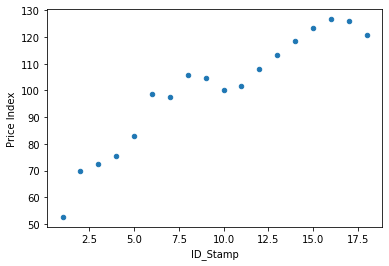

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
df1.plot(x = 'ID_Stamp', y = 'Price Index', kind = 'scatter')


In [0]:
from sklearn.model_selection import train_test_split


In [0]:
#tf.feature_column.numeric_column
ids = tf.feature_column.numeric_column("ID_Stamp")
time = tf.feature_column.numeric_column("Time")
price = tf.feature_column.numeric_column("Price Index")
movement = tf.feature_column.numeric_column("Movement")

In [0]:
feat_cols = [ids, movement]

In [0]:
y_val = Brisbane_Data["Price Index"]

In [0]:
x_data = Brisbane_Data.drop(['Price Index', 'Time'], axis = 1)

In [0]:
#Create test_train split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_val, test_size=0.33, random_state=101)

In [82]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [0]:
X_train = pd.DataFrame(data=scaler.transform(X_train),
                       columns=X_train.columns,
                       index=X_train.index)

In [0]:
X_test = pd.DataFrame(data=scaler.transform(X_test),
                       columns=X_test.columns,
                       index=X_test.index)

In [85]:
#Create feature columns
Brisbane_Data.columns

Index(['ID_Stamp', 'Time', 'Price Index', 'Movement'], dtype='object')

In [0]:
import tensorflow as tf

In [0]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,
                                                 y=y_train,
                                                 batch_size=10,
                                                 num_epochs=1000,
                                                 shuffle=True)

In [118]:
model = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpru3gd20p', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f74e83ad1d0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [119]:
model.train(input_fn=input_func, steps=2000000)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Please use `layer.add_weight` method instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpru3gd20p/model.ckpt.
INFO:tensorflow:loss = 103840.73, step = 1
INFO:tensorflow:global_step/sec: 388.807
INFO:tensorflow:loss = 109841.48, step = 101 (0.261 sec)
INFO:tensorflow:global_step/sec: 467.204
INFO:tensorflow:loss = 90607.44, step = 201 (0.220 sec)
INFO:tensorflow:global_step/sec: 414.435
INFO:tensorflow:loss = 106996.98, step = 301 (0.241 sec)
INFO:tensorflow:global_step/sec: 434.38
INFO:tensorflow:loss = 89675.04, step = 401 (0.228 sec)
INFO:tensorflow:global_step/sec: 496.252
INFO:tensorflow:loss = 76477.46, step = 501 (0.201 sec)
INFO:tensorflow:global_step/sec: 462.813
INFO:tensorflow:loss = 79511.375, step = 601 

In [0]:
predict_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,
                                                         batch_size=10,
                                                         num_epochs=1,
                                                         shuffle=False)

In [0]:
pred_gen = model.predict(predict_input_func)

In [122]:
predictions = list(pred_gen)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpru3gd20p/model.ckpt-1200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [123]:
predictions

[{'predictions': array([16.79581], dtype=float32)},
 {'predictions': array([27.595863], dtype=float32)},
 {'predictions': array([29.896408], dtype=float32)},
 {'predictions': array([15.981367], dtype=float32)},
 {'predictions': array([11.827429], dtype=float32)},
 {'predictions': array([27.17314], dtype=float32)}]

In [0]:
final_preds = []

for pred in predictions:
  final_preds.append(pred['predictions'])

In [0]:
from sklearn.metrics import mean_squared_error

In [126]:
mean_squared_error(y_test, final_preds)**0.5

69.29829693002378

In [127]:
Brisbane_Data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID_Stamp,18.0,9.500000,5.338539,1.0,5.250,9.5,13.750,18.0
Price Index,18.0,99.894444,21.436485,52.6,86.675,103.2,117.100,126.6
Movement,18.0,5.000000,8.849792,-5.2,-0.300,4.0,5.775,32.5
